In [310]:
import pandas as pd

In [311]:
base = pd.read_excel("../../Bases/Base_tratada.xlsx")

In [312]:
base

,V0001,V0022,A02201|A02305|A02306,C006,C008,C009,N010,P00104,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,reg1,4,1,2,19,4,1,65.0,152.0,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Sobrepeso
1,reg1,2,0,2,28,4,1,55.0,176.0,1,31-60,4,Nunca fumou,Nunca fumou,2,2,2,2,Normal
2,reg1,4,1,2,38,1,1,60.0,156.0,0,Não pratica,2,21+,Fuma atualmente,2,2,2,2,Normal
3,reg1,1,2,1,36,1,1,80.0,172.0,2,61-90,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
4,reg1,3,0,1,42,1,1,95.0,185.0,3,91-120,3,13-16,1-5,2,1,2,2,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,reg1,4,2,1,41,4,1,74.0,159.0,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
43012,reg1,3,0,1,21,2,1,64.0,178.0,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Normal
43013,reg1,5,2,1,44,2,2,62.0,162.0,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Normal
43014,reg1,6,3,2,26,4,1,75.0,150.0,0,Não pratica,4,Nunca fumou,Nunca fumou,1,2,2,2,Obeso


In [313]:
base['Q074'].value_counts()

Q074
2    40806
1     2210
Name: count, dtype: int64

## Codificação de atributos

In [314]:
bins = [0, 24, 33, 42, 51]
labels = ['15-24', '25-33', '34-42', '43-50']

base['C008'] = pd.cut(base['C008'], bins=bins, labels=labels, right=False)

mapeamento = {
    '15-24': 0,
    '25-33': 1,
    '34-42': 2,
    '43-50': 3
}

base['C008'] = base['C008'].map(mapeamento)


In [315]:
bins = [0, 55, 80, 105, 130, 155, 200]
labels = ['30-55', '56-80', '81-105', '106-130', '131-155', '156-180']

base['P00104'] = pd.cut(base['P00104'], bins=bins, labels=labels, right=False)

mapeamento = {
    '30-55': 0,
    '56-80': 1,
    '81-105': 2,
    '106-130': 3,
    '131-155': 4,
    '156-180': 5
}

base['P00104'] = base['P00104'].map(mapeamento)

In [316]:
base['P00104'].value_counts()

P00104
1    25969
2    11171
0     4349
3     1374
4      145
5        8
Name: count, dtype: int64

In [317]:
valores = base['P00404']
valores = valores.value_counts().sort_index()
tamanho = len(valores) / 5
# tamanho
valores

P00404
141.000000      24
142.000000      45
143.000000      56
144.000000      46
145.000000     213
146.000000     102
147.000000     158
148.000000     185
149.000000     292
150.000000     992
151.000000     346
152.000000     774
153.000000     772
154.000000     668
155.000000    1550
156.000000    1004
157.000000     879
158.000000    1160
159.000000    1029
160.000000    3083
161.000000     785
162.000000    1693
163.000000    1561
164.000000    1213
165.000000    3184
165.631456      61
165.942283     714
166.000000     923
167.000000    1361
168.000000    1749
169.000000    1138
170.000000    2717
171.000000     793
172.000000    1439
173.000000    1069
174.000000     838
175.000000    1844
176.000000     780
177.000000     538
178.000000    1036
179.000000     490
180.000000    1131
181.000000     283
182.000000     401
183.000000     325
184.000000     246
185.000000     389
186.000000     222
187.000000     231
188.000000     113
189.000000     111
190.000000     173
191.0

In [318]:
bins = [140, 150, 160, 170, 180, 200]
labels = ['140-150', '151-160', '161-170', '171-180', '181+']

base['P00404'] = pd.cut(base['P00404'], bins=bins, labels=labels, right=False)

mapeamento = {
    '140-150': 0,
    '151-160': 1,
    '161-170': 2,
    '171-180': 3,
    '181+': 4,
}

base['P00404'] = base['P00404'].map(mapeamento)

In [319]:
base['P00404'].value_counts()

P00404
2    17465
3    11544
1     9174
4     3712
0     1121
Name: count, dtype: int64

In [320]:
mapeamento = {
    'reg1': 0,
    'reg2': 1,       
}

# Aplicar o mapeamento à coluna 'IMC'
base['V0001'] = base['V0001'].map(mapeamento)

In [321]:
mapeamento = {
    'Não pratica': 0,
    '<30': 1,       
    '31-60': 2,
    '61-90': 3,
    '91-120': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P03701|P03702'] = base['P03701|P03702'].map(mapeamento)

In [322]:
mapeamento = {
    'Nunca fumou': 0,
    '<=12': 1,       
    '13-16': 2,
    '17-20': 3,
    '21+': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P053'] = base['P053'].map(mapeamento)

In [323]:
base['P05901|P05902|P05903|P05904'].value_counts()

P05901|P05902|P05903|P05904
Nunca fumou        30407
Fuma atualmente     4652
5-15                2994
15+                 2837
1-5                 1721
Menos de 1 ano       405
Name: count, dtype: int64

In [324]:
mapeamento = {
    'Fuma atualmente': 0,
    'Menos de 1 ano': 1,
    '1-5': 2,
    '5-15': 3,
    '15+': 4,
    'Nunca fumou': 5,
}

# Aplicar o mapeamento à coluna 'IMC'
base['P05901|P05902|P05903|P05904'] = base['P05901|P05902|P05903|P05904'].map(mapeamento)

In [325]:
mapeamento_imc = {
    'Normal': 0,      
    'Sobrepeso': 1,
    'Obeso': 2,
}

# Aplicar o mapeamento à coluna 'IMC'
base['IMC'] = base['IMC'].map(mapeamento_imc)

In [326]:
base

,V0001,V0022,A02201|A02305|A02306,C006,C008,C009,N010,P00104,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,0,4,1,2,0,4,1,1,1,0,0,1,2,0,2,2,2,2,1
1,0,2,0,2,1,4,1,1,3,1,2,4,0,5,2,2,2,2,0
2,0,4,1,2,2,1,1,1,1,0,0,2,4,0,2,2,2,2,0
3,0,1,2,1,2,1,1,2,3,2,3,4,0,5,2,2,2,2,1
4,0,3,0,1,3,1,1,2,4,3,4,3,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,0,4,2,1,2,4,1,1,1,0,0,4,0,5,2,2,2,2,1
43012,0,3,0,1,0,2,1,1,3,0,0,1,2,0,2,2,2,2,0
43013,0,5,2,1,3,2,2,1,2,0,0,4,0,5,2,2,2,2,0
43014,0,6,3,2,1,4,1,1,1,0,0,4,0,5,1,2,2,2,2


## Correlação

In [327]:
import seaborn as sns

In [328]:
base[['Q074','Q11604']].corr(method='pearson')

,Q074,Q11604
Q074,1.000000,0.141051
Q11604,0.141051,1.000000


<AxesSubplot: >

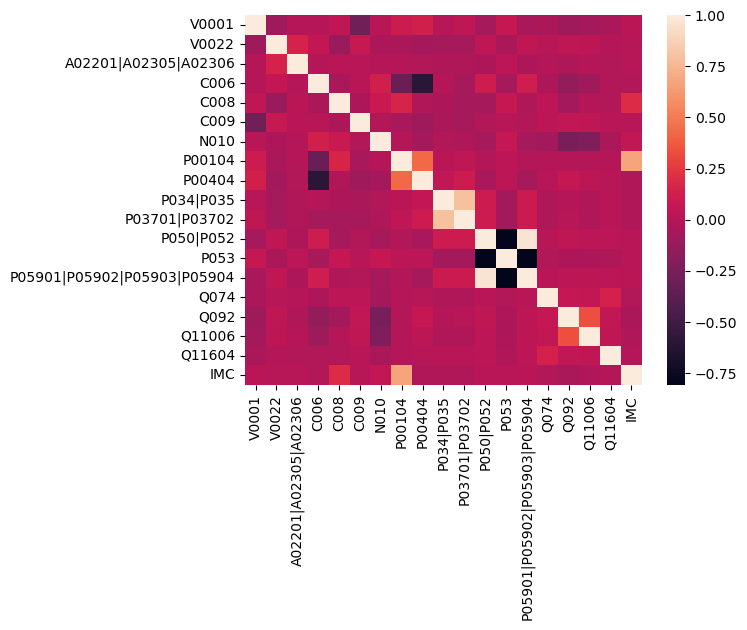

In [329]:
sns.heatmap(base.corr(method='pearson'))

## Valores Duplicados

In [330]:
base.drop_duplicates(inplace=True)

## Separação dos valores de treino e teste

In [331]:
base

,V0001,V0022,A02201|A02305|A02306,C006,C008,C009,N010,P00104,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,0,4,1,2,0,4,1,1,1,0,0,1,2,0,2,2,2,2,1
1,0,2,0,2,1,4,1,1,3,1,2,4,0,5,2,2,2,2,0
2,0,4,1,2,2,1,1,1,1,0,0,2,4,0,2,2,2,2,0
3,0,1,2,1,2,1,1,2,3,2,3,4,0,5,2,2,2,2,1
4,0,3,0,1,3,1,1,2,4,3,4,3,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,0,5,2,2,2,4,1,2,2,0,0,4,0,5,2,2,2,2,1
43012,0,3,0,1,0,2,1,1,3,0,0,1,2,0,2,2,2,2,0
43013,0,5,2,1,3,2,2,1,2,0,0,4,0,5,2,2,2,2,0
43014,0,6,3,2,1,4,1,1,1,0,0,4,0,5,1,2,2,2,2


In [332]:
X_prev = base.drop(columns=['Q074'])
y_classe = base['Q074']

In [333]:
X_prev

,V0001,V0022,A02201|A02305|A02306,C006,C008,C009,N010,P00104,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q092,Q11006,Q11604,IMC
0,0,4,1,2,0,4,1,1,1,0,0,1,2,0,2,2,2,1
1,0,2,0,2,1,4,1,1,3,1,2,4,0,5,2,2,2,0
2,0,4,1,2,2,1,1,1,1,0,0,2,4,0,2,2,2,0
3,0,1,2,1,2,1,1,2,3,2,3,4,0,5,2,2,2,1
4,0,3,0,1,3,1,1,2,4,3,4,3,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,0,5,2,2,2,4,1,2,2,0,0,4,0,5,2,2,2,1
43012,0,3,0,1,0,2,1,1,3,0,0,1,2,0,2,2,2,0
43013,0,5,2,1,3,2,2,1,2,0,0,4,0,5,2,2,2,0
43014,0,6,3,2,1,4,1,1,1,0,0,4,0,5,2,2,2,2


In [334]:
y_classe.value_counts()

Q074
2    33543
1     2194
Name: count, dtype: int64

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.30, random_state=42)

In [337]:
X_treino.shape

(25015, 18)

In [338]:
X_teste.shape

(10722, 18)

In [339]:
y_treino.value_counts()

Q074
2    23454
1     1561
Name: count, dtype: int64

In [340]:
y_teste.value_counts()

Q074
2    10089
1      633
Name: count, dtype: int64

In [341]:
import numpy as np

In [342]:
np.savez('Treino_teste/Asma.npz', X_treino=X_treino, X_teste=X_teste, y_treino=y_treino, y_teste=y_teste, feature_names=X_treino.columns)

### OverSampling

In [343]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_treino, y_treino)

In [344]:
print(y_resampled.value_counts())

Q074
1    23454
2    23454
Name: count, dtype: int64


In [345]:
np.savez('Treino_teste/Asma_Over.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### UnderSampling

In [346]:
from imblearn.under_sampling import TomekLinks
balanceamento_under = TomekLinks(sampling_strategy='majority')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [347]:
print(y_under.value_counts())

Q074
2    23026
1     1561
Name: count, dtype: int64


In [348]:
np.savez('Treino_teste/Asma_Under.npz', X_treino=X_under, X_teste=X_teste, y_treino=y_under, y_teste=y_teste, feature_names=X_treino.columns)

### Random UnderSampling

In [349]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_treino, y_treino)

In [350]:
print(y_resampled.value_counts())

Q074
1    1561
2    1561
Name: count, dtype: int64


In [351]:
np.savez('Treino_teste/Asma_RD_Under.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### DSTO-GAN

In [352]:
from dsto_gan import DSTO_GAN
dsto_gan = DSTO_GAN(random_state=42)
X_resampled, y_resampled = dsto_gan.fit_resample(X_treino.values, y_treino.values)

In [353]:
print(y_resampled)

[1 2 2 ... 1 1 1]


In [354]:
np.savez('Treino_teste/Asma_DSTO.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)